In [4]:
# ====================================================
# 🔧 Environment Setup
# ====================================================
import torch, os
from transformers import AutoTokenizer
from scmt.modeling_somt import SchemaAugmentedSOMT
from scmt.modeling_utils import visualize_schemas
from scmt.schema_analysis import analyze_schemas
from scmt.viz_schemas import visualize_schemas as visualize_schemas_enhanced
from scmt.explain import generate_with_schema_attribution, schema_ablation_test
from FastChemTokenizerHF import FastChemTokenizerSelfies


# Path to the model checkpoint 
model_path = "./checkpoints_1/somt_mol_run_2/"

# Load model and tokenizer
model = SchemaAugmentedSOMT.from_pretrained(model_path, map_location="cuda" if torch.cuda.is_available() else "cpu")
tokenizer = FastChemTokenizerSelfies.from_pretrained("./tokenizer_vocab/selftok_reordered")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

print(f"✅ Model loaded on {device}")


✅ Special tokens bound: 0 1 2 3 4
✅ Model loaded on cuda


In [5]:
# Basic textual interpretation
visualize_schemas(model, tokenizer, top_k=10)



=== Schema Interpretability (top 10 tokens per schema) ===

Schema 00: [F] (0.411) | [=Ring2] (0.401) | [=C] (0.382) | [N] (0.367) | [Ring1] (0.365) | [O] (0.339) | [S] (0.330) | [Cl] (0.326) | [=O] (0.325) | [Ring2] (0.319)
Schema 01: [Ring1] (0.550) | [Branch2] (0.514) | [=C] (0.508) | [N] (0.493) | [S] (0.467) | [=Branch2] (0.464) | [O] [C] [Branch1] (0.464) | [N] [=C] (0.452) | [NH1] (0.451) | [N] [C] [C] (0.450)
Schema 02: [F] (0.442) | </s> (0.387) | [=Ring2] (0.384) | [=C] (0.379) | [N] (0.365) | [Ring2] (0.358) | [Ring1] (0.357) | [O] (0.334) | [N] [=C] (0.327) | [=Branch2] (0.327)
Schema 03: [=C] (0.431) | [O] [C] [Branch1] (0.411) | [Branch2] (0.404) | [=Branch1] (0.400) | [C] [C] [C] [C] [C] [C] (0.394) | [N] (0.393) | [NH1] (0.392) | [F] (0.391) | [N] [=C] (0.389) | [=Branch2] (0.384)
Schema 04: [C] (0.552) | [Ring1] (0.552) | [Branch2] (0.552) | [=Branch2] (0.536) | [=Branch1] (0.535) | [N] (0.518) | [S] (0.514) | [#Branch1] (0.499) | [#C] (0.498) | [NH1] (0.478)
Schema 0

In [6]:
visualize_schemas_enhanced(
    model=model,
    tokenizer=tokenizer,
    top_k=10,
    mask_stop=True,
    export="html",  # or "latex"
    export_path=f"{model_path}/schemas_viz.html"
)


Schema 00: [F] (0.411) | [=Ring2] (0.401) | [=C] (0.382) | [N] (0.367) | [Ring1] (0.365) | [O] (0.339) | [S] (0.330) | [Cl] (0.326) | [=O] (0.325) | [Ring2] (0.319)
Schema 01: [Ring1] (0.550) | [Branch2] (0.514) | [=C] (0.508) | [N] (0.493) | [S] (0.467) | [=Branch2] (0.464) | [O] [C] [Branch1] (0.464) | [N] [=C] (0.452) | [NH1] (0.451) | [N] [C] [C] (0.450)
Schema 02: [F] (0.442) | </s> (0.387) | [=Ring2] (0.384) | [=C] (0.379) | [N] (0.365) | [Ring2] (0.358) | [Ring1] (0.357) | [O] (0.334) | [N] [=C] (0.327) | [=Branch2] (0.327)
Schema 03: [=C] (0.431) | [O] [C] [Branch1] (0.411) | [Branch2] (0.404) | [=Branch1] (0.400) | [C] [C] [C] [C] [C] [C] (0.394) | [N] (0.393) | [NH1] (0.392) | [F] (0.391) | [N] [=C] (0.389) | [=Branch2] (0.384)
Schema 04: [Ring1] (0.552) | [Branch2] (0.552) | [=Branch2] (0.552) | [=Branch1] (0.536) | [N] (0.535) | [S] (0.518) | [#Branch1] (0.514) | [#C] (0.499) | [NH1] (0.498)
Schema 05: [F] (0.378) | [=Ring2] (0.368) | [=O] (0.341) | [C] [=C] [C] [=Branch1] 

🔍 Found 5 redundant schema pairs (cos>0.95)
  Schema 0 ↔ 12: 0.964
  Schema 0 ↔ 23: 0.952
  Schema 2 ↔ 23: 0.968
  Schema 10 ↔ 22: 0.974
  Schema 27 ↔ 29: 0.957


d:\ProgramData\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


💡 Avg intra-cluster cosine: 0.613
✅ Saved schema analysis → ./checkpoints_1/somt_mol_run_2//schema_analysis.json


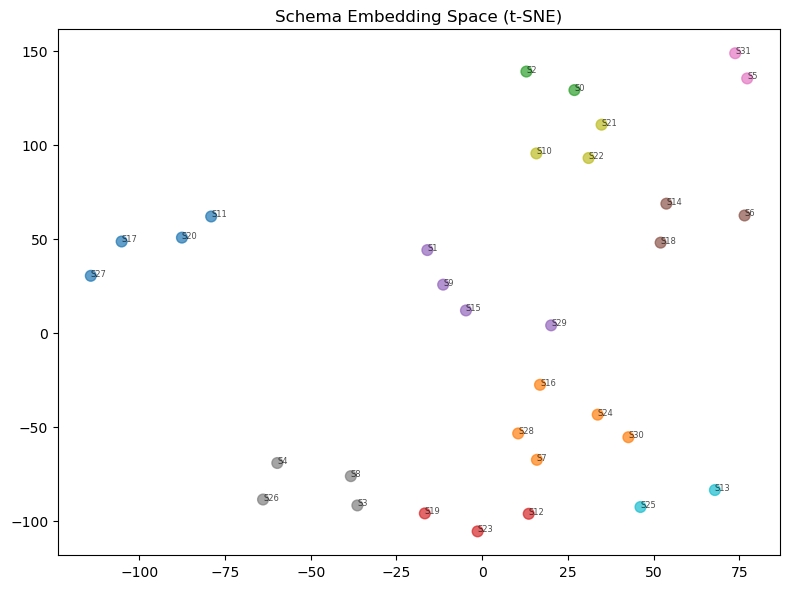

{'positions': [[26.90393829345703, 129.13140869140625], [-15.992843627929688, 43.97119903564453], [12.893112182617188, 138.99923706054688], [-36.401634216308594, -91.94625854492188], [-59.75678253173828, -69.37374877929688], [77.28529357910156, 135.3476104736328], [76.52629089355469, 62.38406753540039], [15.955676078796387, -67.67445373535156], [-38.310489654541016, -76.36646270751953], [-11.384784698486328, 25.56540298461914], [15.804466247558594, 95.42674255371094], [-79.04187774658203, 61.85668182373047], [13.572056770324707, -96.39852142333984], [67.86782836914062, -83.76640319824219], [53.71392822265625, 68.67181396484375], [-4.735518455505371, 11.837010383605957], [16.861026763916016, -27.74977684020996], [-105.15048217773438, 48.535377502441406], [52.03986358642578, 47.92877960205078], [-16.726909637451172, -96.19135284423828], [-87.57139587402344, 50.595645904541016], [34.813232421875, 110.71144104003906], [31.02217674255371, 92.96369934082031], [-1.3303720951080322, -105.76413

In [7]:
analysis = analyze_schemas(model, tokenizer, top_k=10, save_path=f"{model_path}/schema_analysis.json")
print(analysis)  # Print the analysis summary

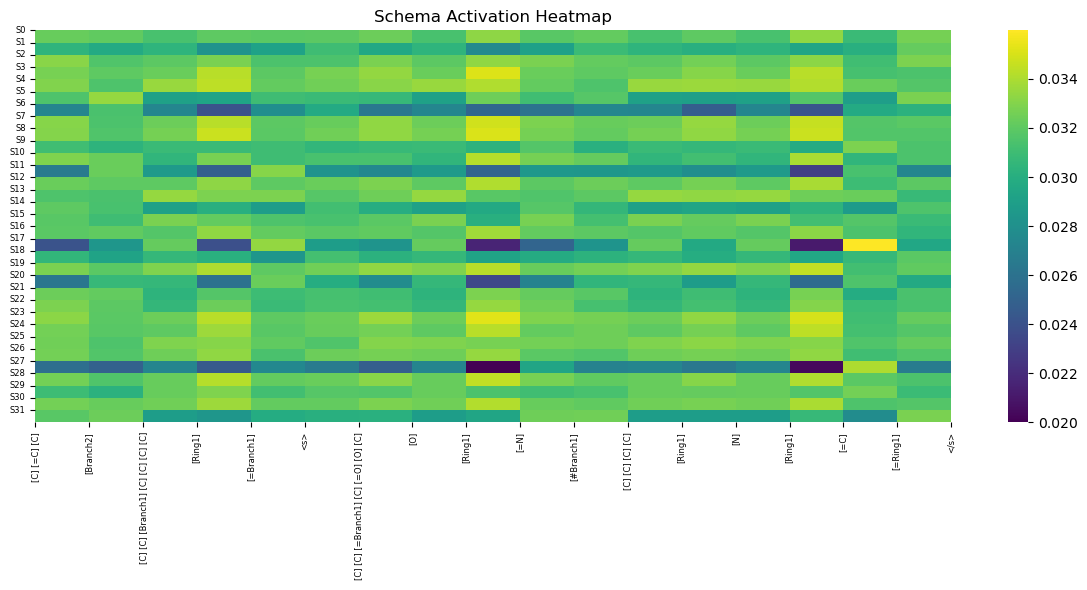

[C] [=C] [C] [Branch2] [C] [C] [Branch1] [C] [C] [C] [C] [Ring1] [=Branch1] [C] [C] [=Branch1] [C] [=O] [O] [C] [O] [Ring1] [=N] [#Branch1] [C] [C] [C] [C] [Ring1] [N] [Ring1] [=C] [=Ring1]


In [14]:
result = generate_with_schema_attribution(
    model,
    tokenizer,
    prompt="[C] [=C] [C]",
    max_len=60,
    temperature=0.8,
    visualize_heatmap=True
)
print(result['text'])

In [20]:
schema_ablation_test(model, tokenizer, prompt="[C] [=C] [C] [Branch2] [C] [C] [Branch1] [C] [C] [C] [C] [Ring1]", max_len=40)



=== Schema Ablation ΔPPL ===
schema_0: +22.7314
schema_1: +22.0041
schema_2: +24.6759
schema_3: +18.8998
schema_4: +25.0790
schema_5: +21.9881
schema_6: +21.9487
schema_7: +23.2643
schema_8: +23.0936
schema_9: +21.9952
schema_10: +23.3669
schema_11: +21.9373
schema_12: +22.3318
schema_13: +22.3284
schema_14: +22.0033
schema_15: +22.2237
schema_16: +21.9531
schema_17: +21.9503
schema_18: +21.9727
schema_19: +23.4398
schema_20: +21.9488
schema_21: +22.5149
schema_22: +22.6229
schema_23: +21.0096
schema_24: +23.1771
schema_25: +24.0422
schema_26: +23.3615
schema_27: +21.9487
schema_28: +22.4667
schema_29: +22.3398
schema_30: +23.2065
schema_31: +21.9813


{'schema_0': 22.73139190673828,
 'schema_1': 22.00414276123047,
 'schema_2': 24.675865173339844,
 'schema_3': 18.89984893798828,
 'schema_4': 25.07903289794922,
 'schema_5': 21.988121032714844,
 'schema_6': 21.94866180419922,
 'schema_7': 23.26428985595703,
 'schema_8': 23.09362030029297,
 'schema_9': 21.995216369628906,
 'schema_10': 23.366859436035156,
 'schema_11': 21.937294006347656,
 'schema_12': 22.331809997558594,
 'schema_13': 22.32837677001953,
 'schema_14': 22.00328826904297,
 'schema_15': 22.22370147705078,
 'schema_16': 21.953102111816406,
 'schema_17': 21.95030975341797,
 'schema_18': 21.972694396972656,
 'schema_19': 23.439842224121094,
 'schema_20': 21.94879913330078,
 'schema_21': 22.51488494873047,
 'schema_22': 22.62285614013672,
 'schema_23': 21.009605407714844,
 'schema_24': 23.17705535888672,
 'schema_25': 24.042198181152344,
 'schema_26': 23.361534118652344,
 'schema_27': 21.94873809814453,
 'schema_28': 22.46668243408203,
 'schema_29': 22.33983612060547,
 'schema